# **UAS BIG DATA**
## Kelompok 5:
1. Rifan Ene Saputra	20.11.3709
2. Satya Tegar Kusuma	20.11.3708
3. Miftahudin Faiz	20.11.3675
4. Iman Saputra	20.11.3726
5. Muhammad Bastian Hanafi	20.11.3714

## **Library Imports**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Reading datasets obtained from UCI using GitHub raw**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/miftahudinfaiz/UAS-EDA/'main'/Tetuan%20City%20power%20consumption.csv")

## **Printing out the datasets**

In [6]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


## **Checking whether the data has n/a column**

In [4]:
df.isna().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

## **Dropping n/a data if exist**

In [146]:
newData = df.dropna()
newData.isna().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

## **Printing out the data info**

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## **Converting "DateTime" data type into datetime**

In [11]:
date = pd.to_datetime(df["DateTime"])
df.drop(["DateTime"], axis = 1, inplace = True)
df.insert(0, "DateTime", date)
df["DateTime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52416 entries, 0 to 52415
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 409.6 KB


## **Printing out the data info after change**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


## **Describing datasets to take a glimpse of the data calculation**

In [13]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


## **Printing out the data as a dataframe**

In [14]:
df.ffill()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


## **Printing out the column names of the data**

In [15]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

## **Data scatter from the datasets**

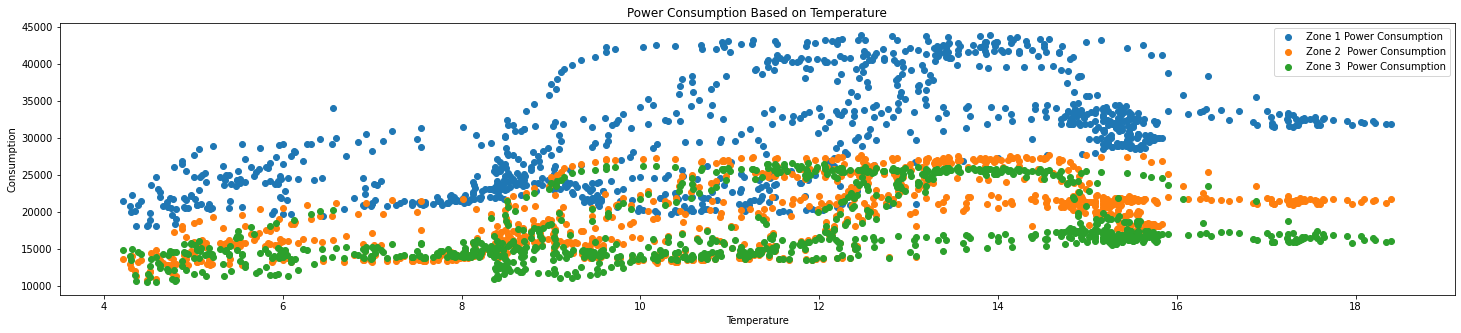

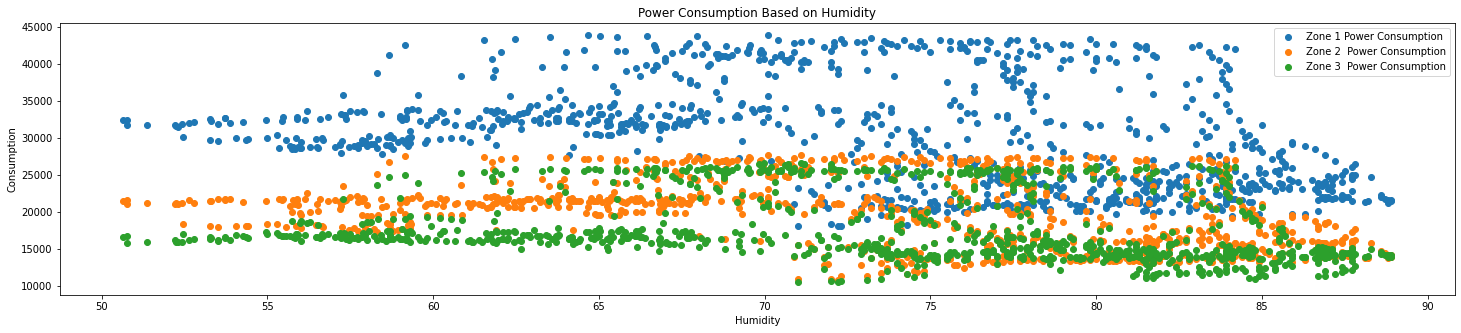

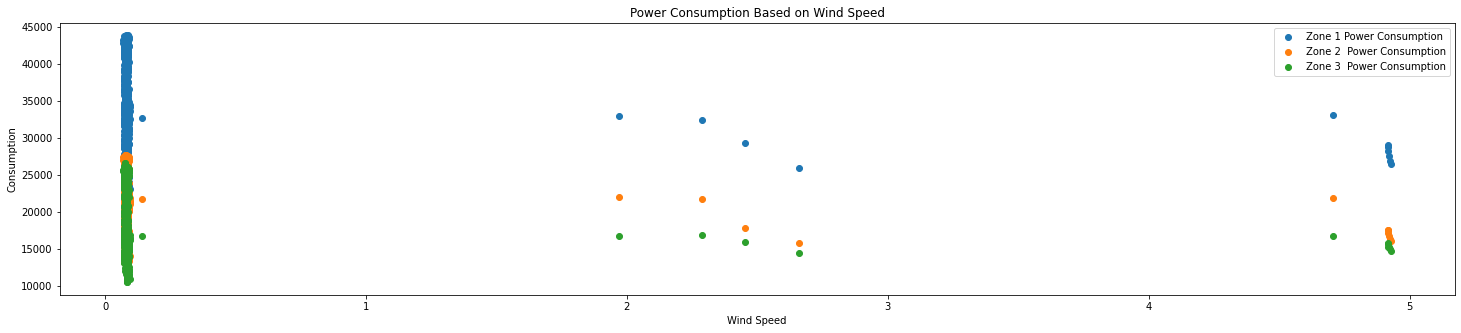

In [20]:
def dfScatter(yData):
    plt.subplots(figsize=(25, 5))
    plt.title(f"Power Consumption Based on {yData}")
    plt.xlabel(yData)
    plt.ylabel("Consumption")
    plt.scatter(df[yData][0:1000], df["Zone 1 Power Consumption"][0:1000])
    plt.scatter(df[yData][0:1000], df["Zone 2  Power Consumption"][0:1000])
    plt.scatter(df[yData][0:1000], df["Zone 3  Power Consumption"][0:1000])
    plt.legend(["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"])
    plt.show()
dfScatter("Temperature")
dfScatter("Humidity")
dfScatter("Wind Speed")

## **Line chart from the datasets**

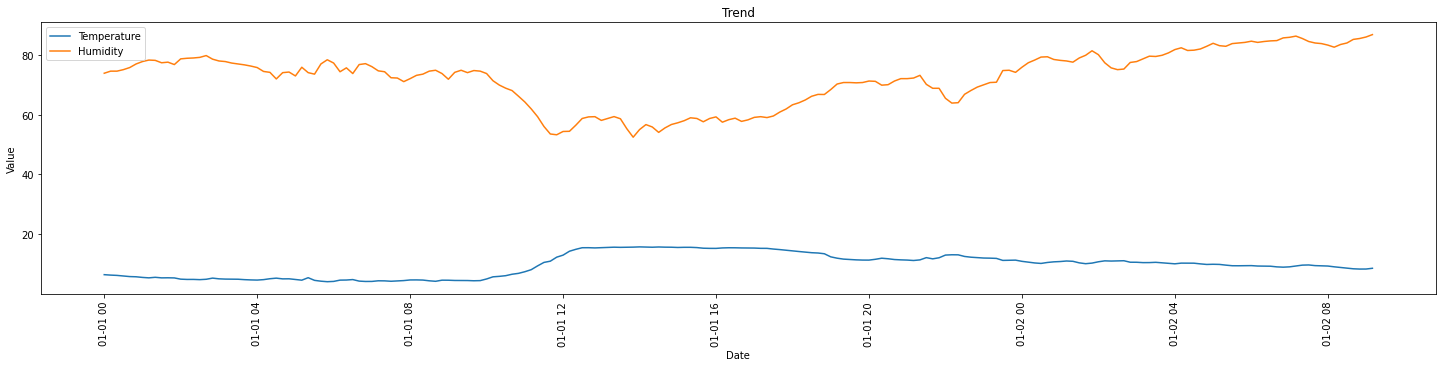

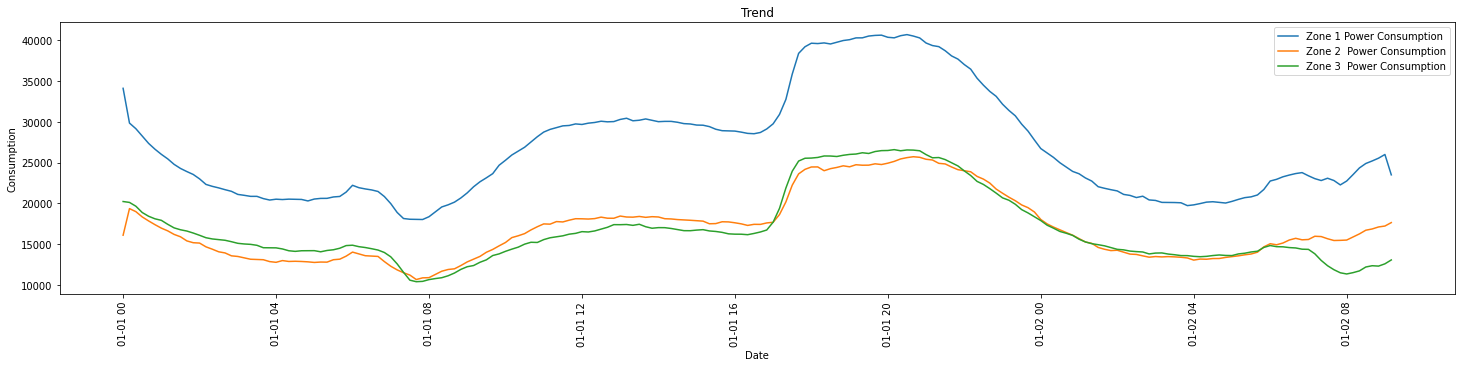

In [19]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(df.DateTime[0:200], df.Temperature[0:200])
ax.plot(df.DateTime[0:200], df.Humidity[0:200])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Trend")
plt.legend(["Temperature", "Humidity"])
plt.show()
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(df.DateTime[0:200], df["Zone 1 Power Consumption"][0:200])
ax.plot(df.DateTime[0:200], df["Zone 2  Power Consumption"][0:200])
ax.plot(df.DateTime[0:200], df["Zone 3  Power Consumption"][0:200])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("Trend")
plt.legend(["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"])
plt.show()

## **Data histogram from the datasets**

C:\Users\Aizu\AppData\Local\Temp\ipykernel_17880\2660532100.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'DateTime'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed'}>,
        <AxesSubplot:title={'center':'general diffuse flows'}>,
        <AxesSubplot:title={'center':'diffuse flows'}>],
       [<AxesSubplot:title={'center':'Zone 1 Power Consumption'}>,
        <AxesSubplot:title={'center':'Zone 2  Power Consumption'}>,
        <AxesSubplot:title={'center':'Zone 3  Power Consumption'}>]],
      dtype=object)

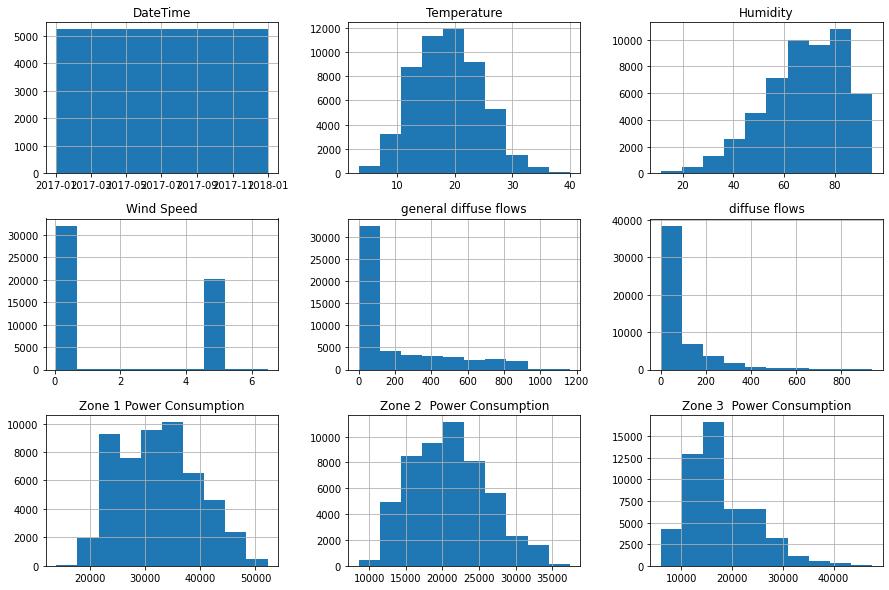

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
df.hist(ax=ax)

## **Overall histogram from the datasets**

<AxesSubplot:title={'center':'Histogram Of Tetuan City Power Consumption'}, ylabel='Frequency'>

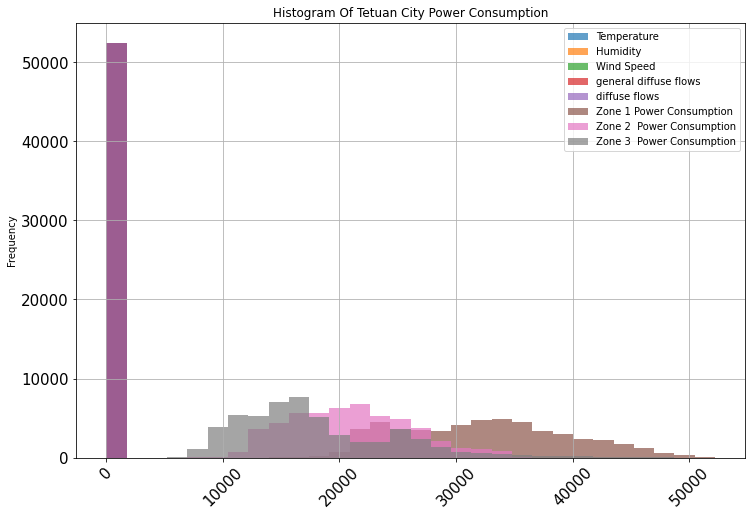

In [22]:
df.plot(kind="hist",
    alpha=0.7,
    bins=30,
    title="Histogram Of Tetuan City Power Consumption",
    rot=45,
    grid=True,
    figsize=(12,8),
    fontsize=15)

## **Data correlation from the datasets**

In [24]:
df.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
Zone 1 Power Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000


## **Data correlation heatmap from the datasets**

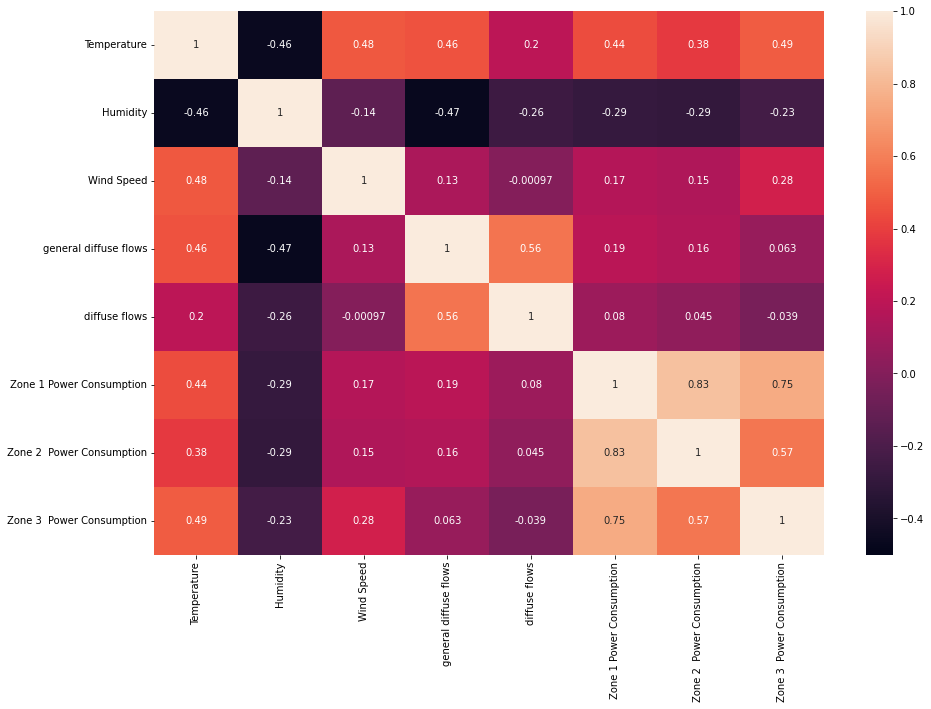

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), vmin=-0.5, vmax=1,annot = True, ax=ax)

## **Regression models across conditional subsets of the datasets**

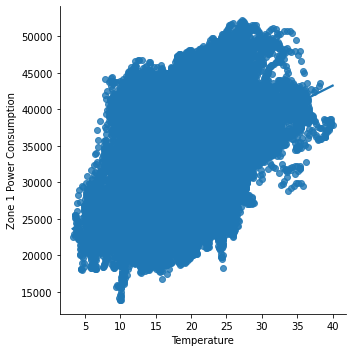

In [25]:
sns.lmplot(x ="Temperature", y ="Zone 1 Power Consumption", data = df, order = 2, ci = None)

## **Finding the Pearson Correlation Coefficient and P value from the datasets**

In [190]:
def pcoef(var1, var2):
    pearson_coef, p_value = stats.pearsonr(df[var1], df[var2])
    if pearson_coef > 0:
        conclusion1 = "Total correlation is positive"
    elif pearson_coef == 0:
        conclusion1 = "There is no linear correlation"
    elif pearson_coef < 0:
        conclusion1 = "Total correlation is negative"
    if p_value < 0.001:
        conclusion2 = "the correlation is significant and strong"
    elif p_value < 0.05:
        conclusion2 = "the correlation is significant"
    elif p_value < 0.1:
        conclusion2 = "the correlation is significant but weak"
    elif p_value > 0.1:
        conclusion2 = "there is no significant correlation"
    print(f"The Pearson Correlation Coefficient of {var1} and {var2} is {pearson_coef} with a P-value of P = {p_value}, {conclusion1} and {conclusion2}\n")

pcoef("Temperature", "Zone 1 Power Consumption")
pcoef("Temperature", "Zone 2  Power Consumption")
pcoef("Temperature", "Zone 3  Power Consumption")
pcoef("Humidity", "Zone 1 Power Consumption")
pcoef("Humidity", "Zone 2  Power Consumption")
pcoef("Humidity", "Zone 3  Power Consumption")
pcoef("Wind Speed", "Zone 1 Power Consumption")
pcoef("Wind Speed", "Zone 2  Power Consumption")
pcoef("Wind Speed", "Zone 3  Power Consumption")

The Pearson Correlation Coefficient of Temperature and Zone 1 Power Consumption is 0.4402207890291421 with a P-value of P = 0.0, Total correlation is positive and the correlation is significant and strong

The Pearson Correlation Coefficient of Temperature and Zone 2  Power Consumption is 0.38242810649178494 with a P-value of P = 0.0, Total correlation is positive and the correlation is significant and strong

The Pearson Correlation Coefficient of Temperature and Zone 3  Power Consumption is 0.48952730841379627 with a P-value of P = 0.0, Total correlation is positive and the correlation is significant and strong

The Pearson Correlation Coefficient of Humidity and Zone 1 Power Consumption is -0.2874206017579741 with a P-value of P = 0.0, Total correlation is negative and the correlation is significant and strong

The Pearson Correlation Coefficient of Humidity and Zone 2  Power Consumption is -0.29496142364036404 with a P-value of P = 0.0, Total correlation is negative and the correla

## **Finding the regression from a data in datasets**

In [34]:
def regFunc(varX, varY):
    np.random.seed(100)
    split = np.random.rand(len(df))<0.8
    data_train = df[split]
    data_test = df[~split]
    x_train = np.asanyarray(data_train[[varX]])
    y_train = np.asanyarray(data_train[[varY]])

    x_test = np.asanyarray(data_test[[varX]])
    y_test = np.asanyarray(data_test[[varY]])
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    print(f"The regression of {varX} and {varY} is:")
    print("Coefficients: ", lr_model.coef_)
    print("Intercept: ", lr_model.intercept_)
    # print("\n")

regFunc("Temperature", "Zone 1 Power Consumption")
regFunc("Temperature", "Zone 2  Power Consumption")
regFunc("Temperature", "Zone 3  Power Consumption")
regFunc("Humidity", "Zone 1 Power Consumption")
regFunc("Humidity", "Zone 2  Power Consumption")
regFunc("Humidity", "Zone 3  Power Consumption")
regFunc("Wind Speed", "Zone 1 Power Consumption")
regFunc("Wind Speed", "Zone 2  Power Consumption")
regFunc("Wind Speed", "Zone 3  Power Consumption")

The regression of Temperature and Zone 1 Power Consumption is:
Coefficients:  [[538.3656813]]
Intercept:  [22218.57594443]
The regression of Temperature and Zone 2  Power Consumption is:
Coefficients:  [[339.43924178]]
Intercept:  [14656.12262086]
The regression of Temperature and Zone 3  Power Consumption is:
Coefficients:  [[557.15894098]]
Intercept:  [7358.31803445]
The regression of Humidity and Zone 1 Power Consumption is:
Coefficients:  [[-131.28410947]]
Intercept:  [41304.45833119]
The regression of Humidity and Zone 2  Power Consumption is:
Coefficients:  [[-97.82550547]]
Intercept:  [27717.6971012]
The regression of Humidity and Zone 3  Power Consumption is:
Coefficients:  [[-98.61264688]]
Intercept:  [24566.08620922]
The regression of Wind Speed and Zone 1 Power Consumption is:
Coefficients:  [[505.37581155]]
Intercept:  [31349.31247468]
The regression of Wind Speed and Zone 2  Power Consumption is:
Coefficients:  [[321.82717896]]
Intercept:  [20406.80888009]
The regression o

## **Regression plot of the datasets**

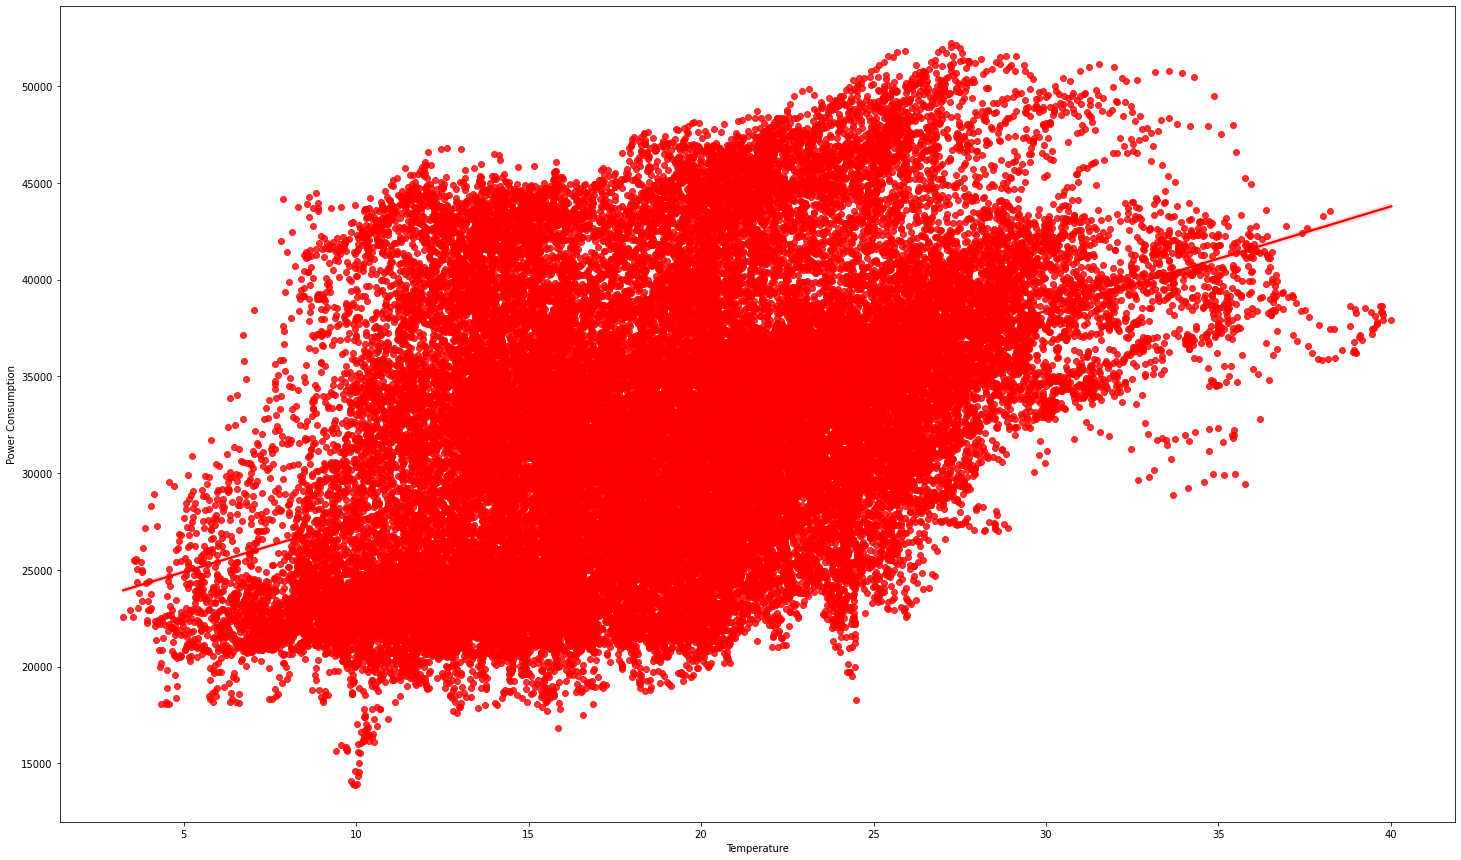

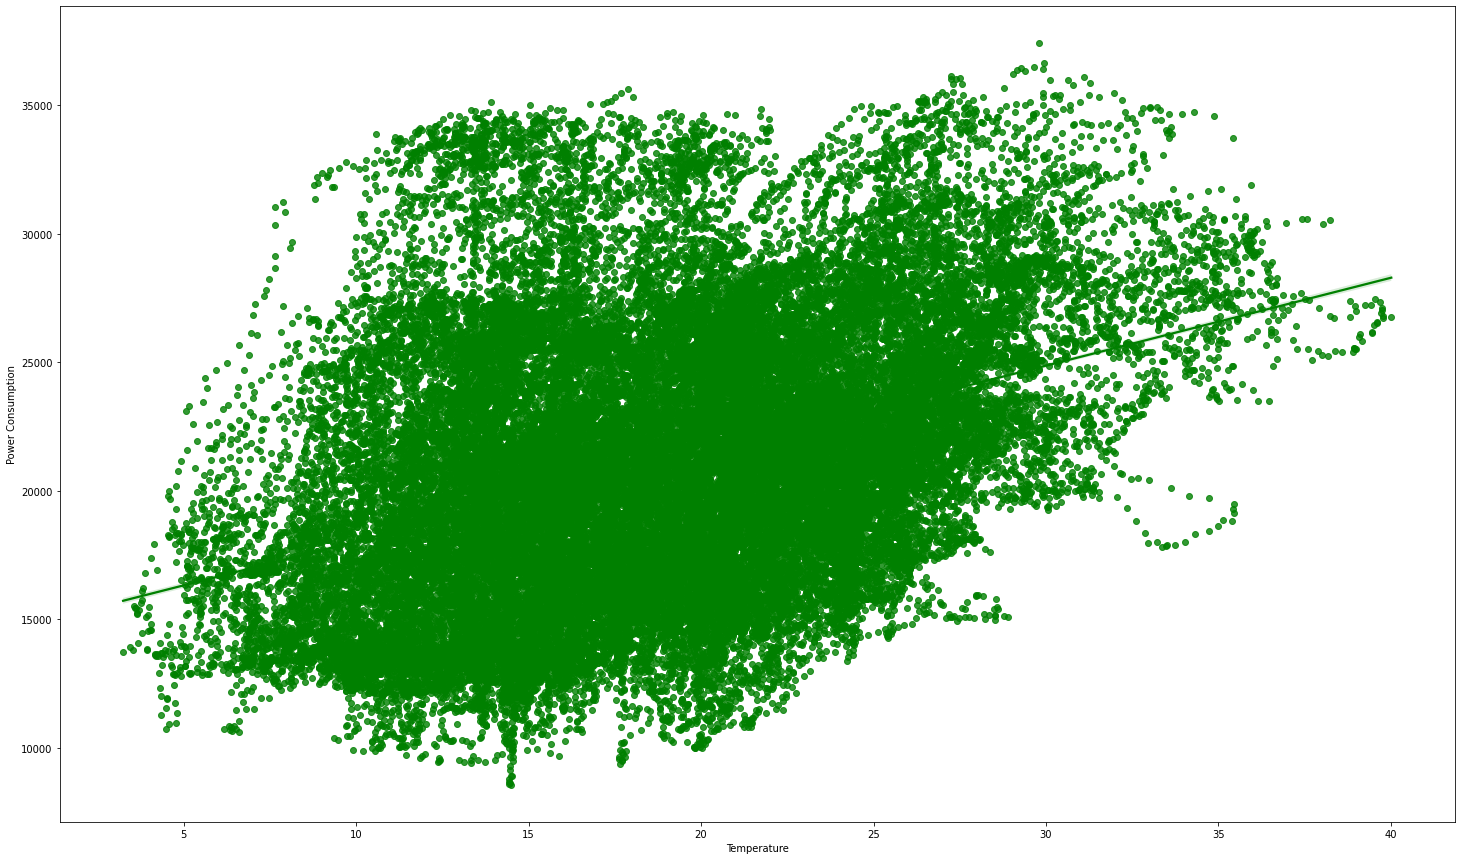

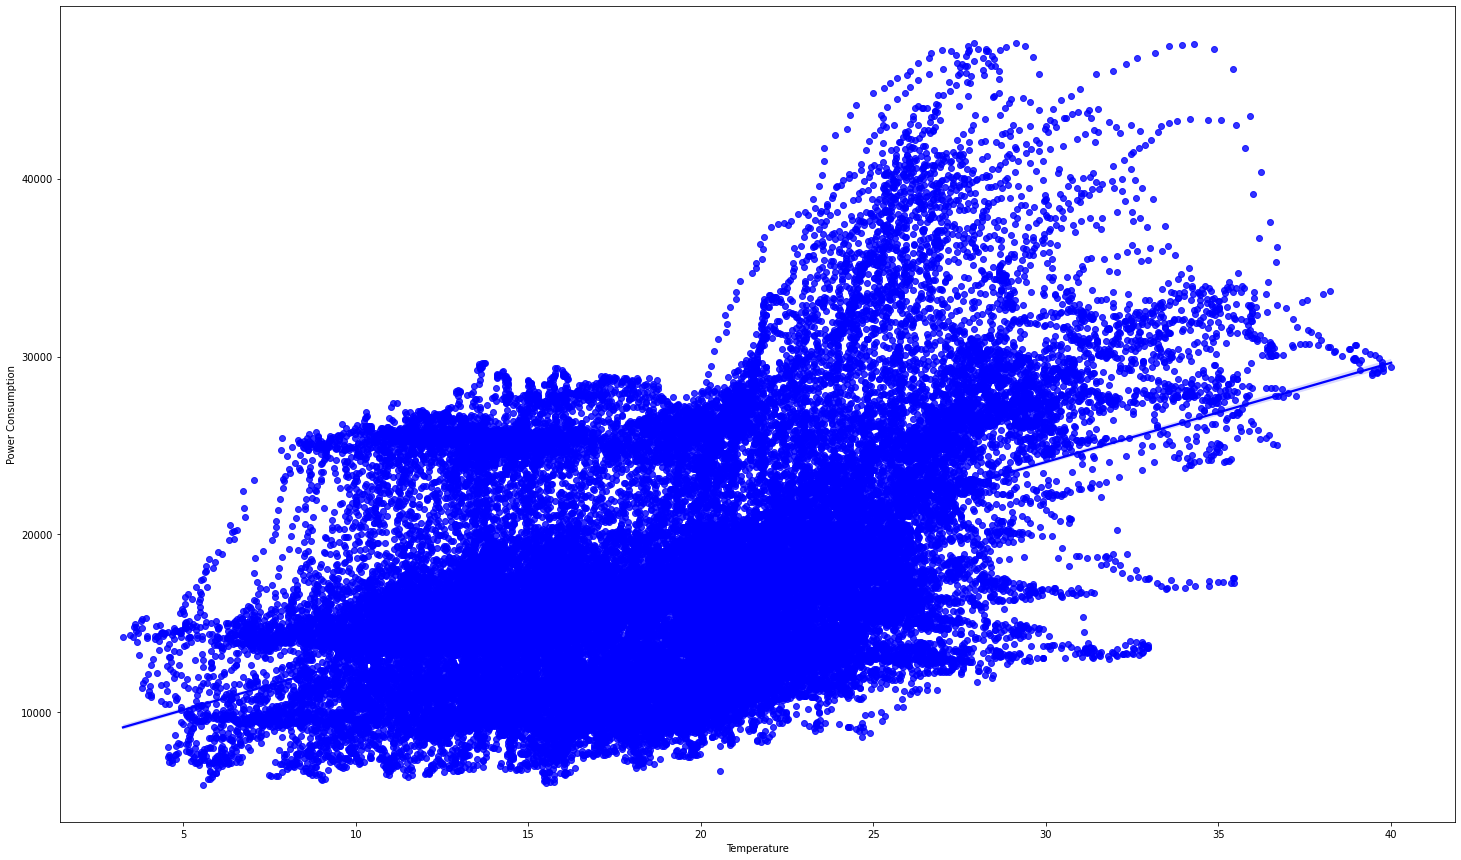

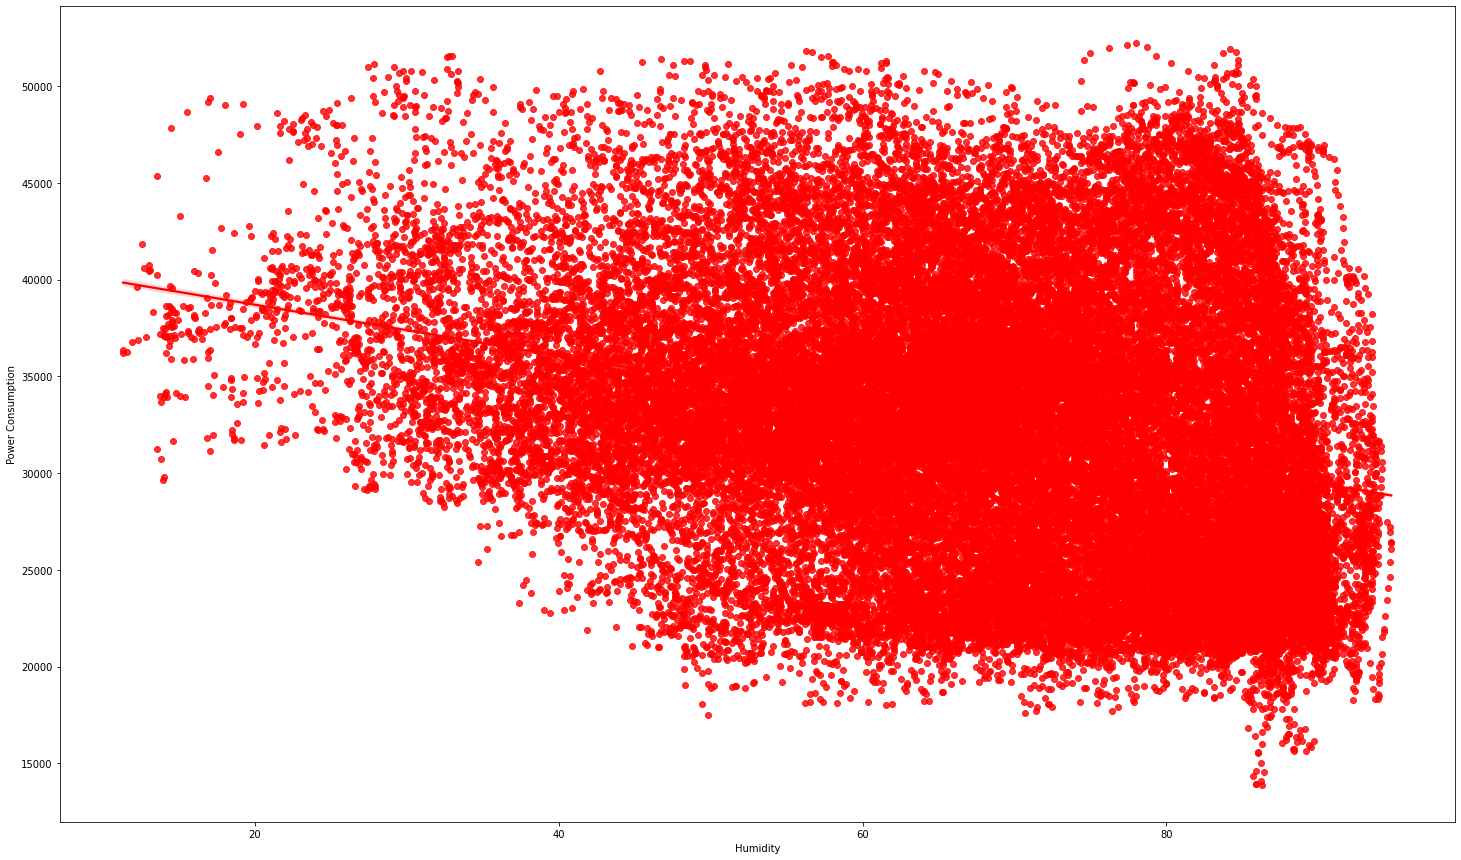

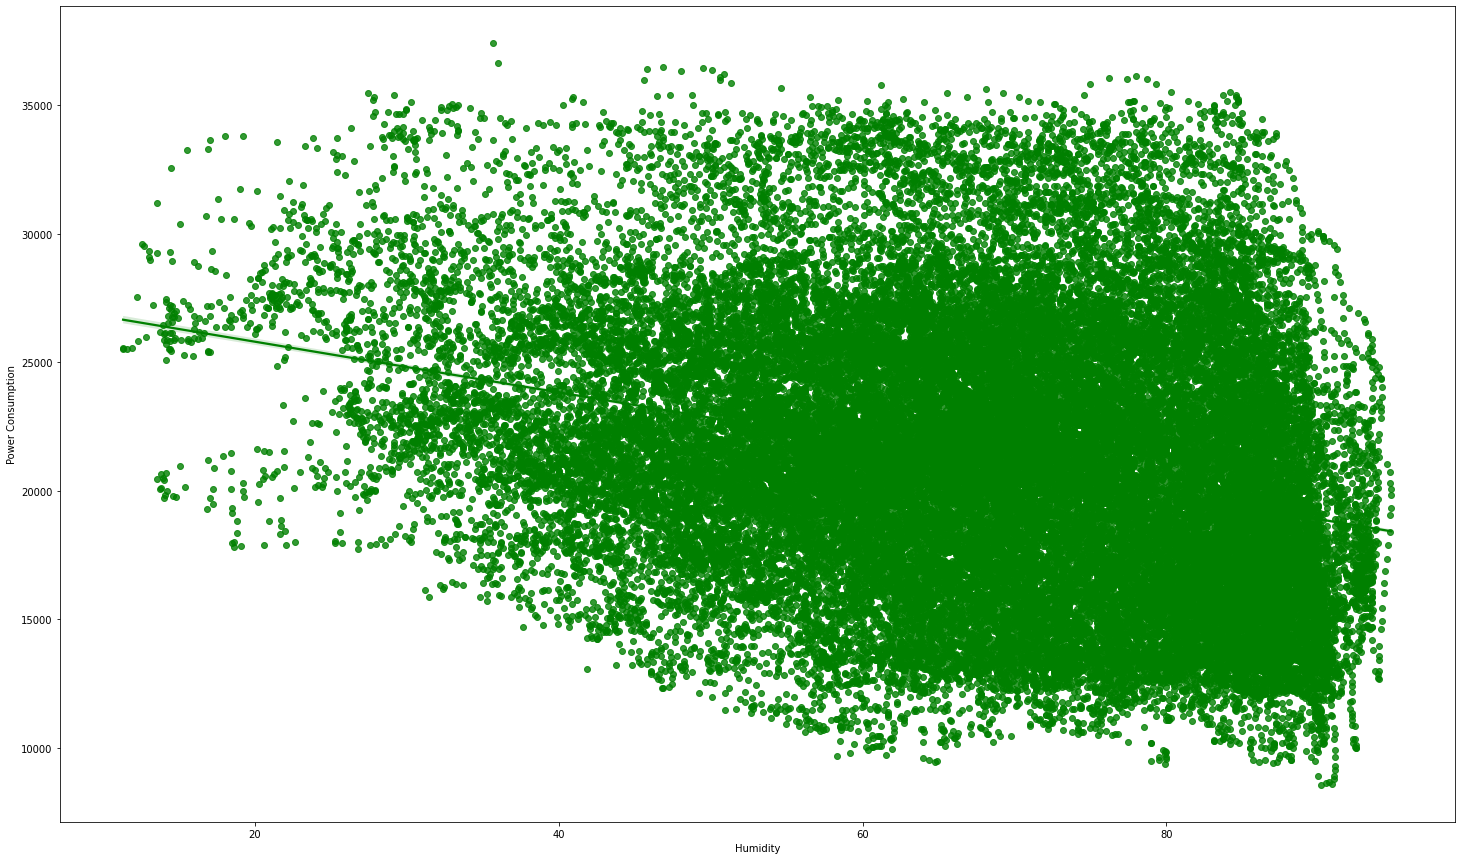

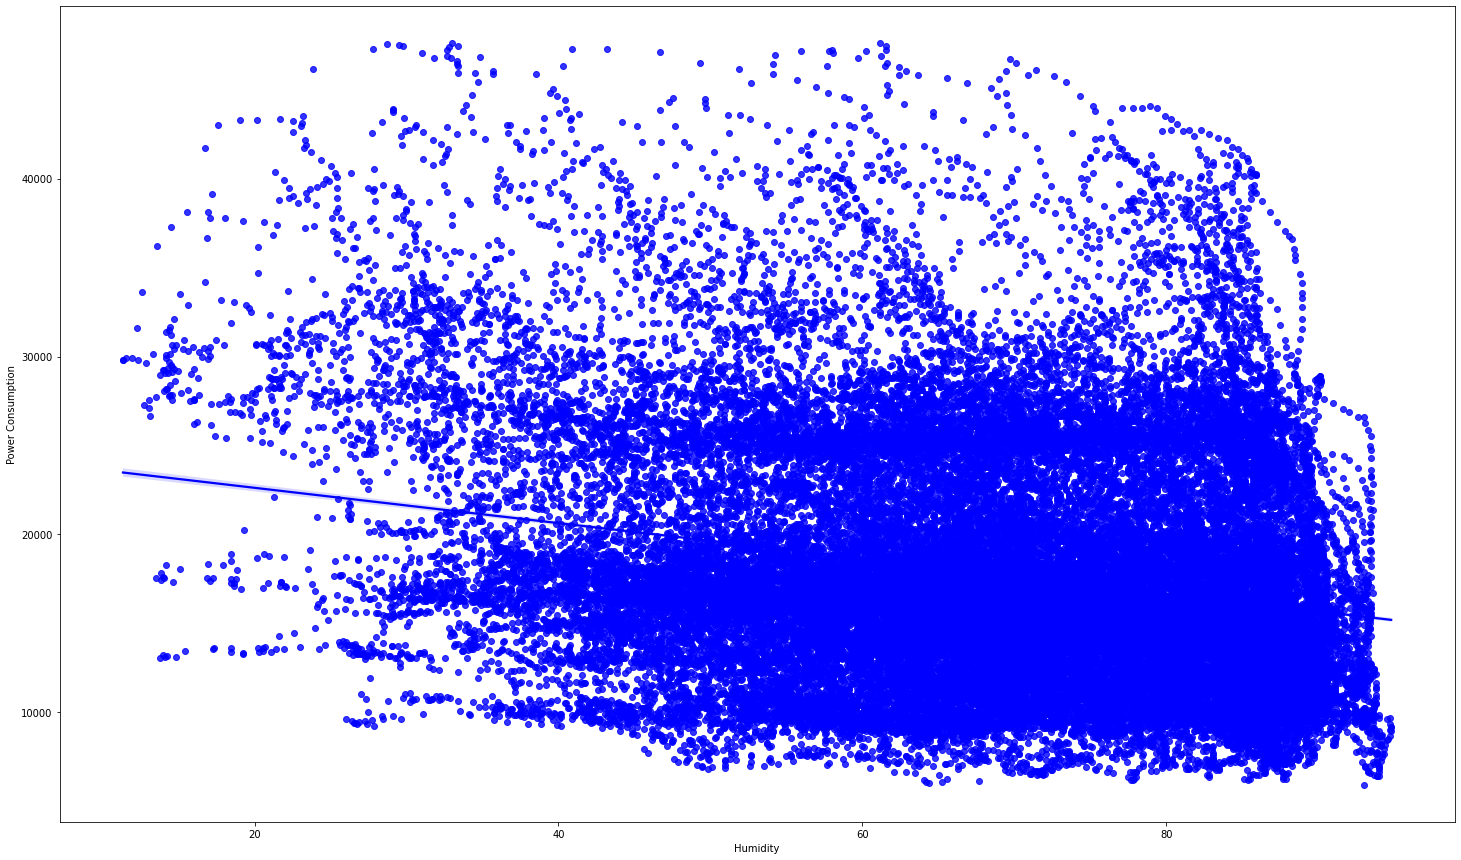

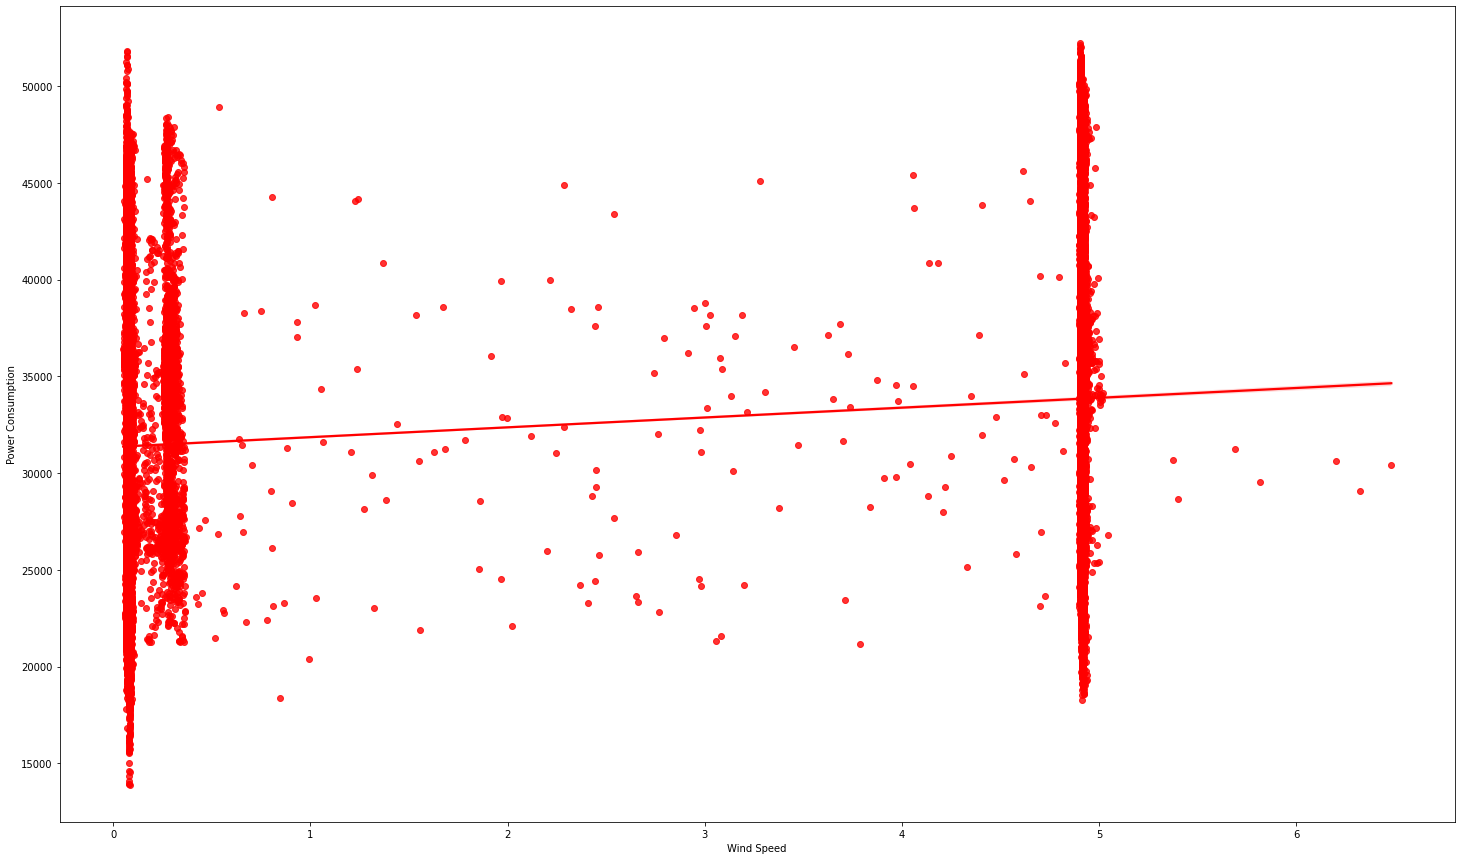

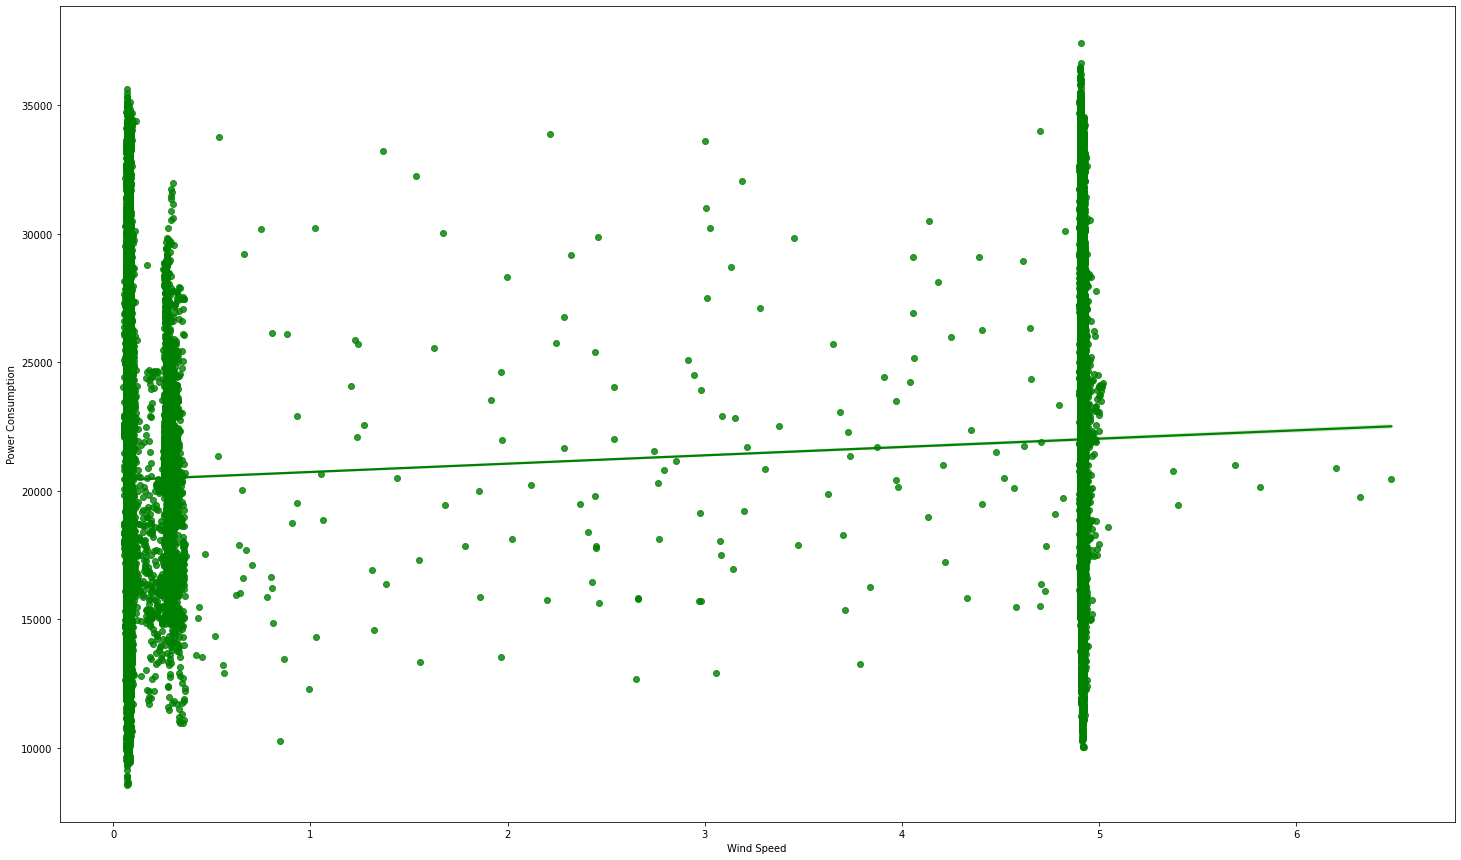

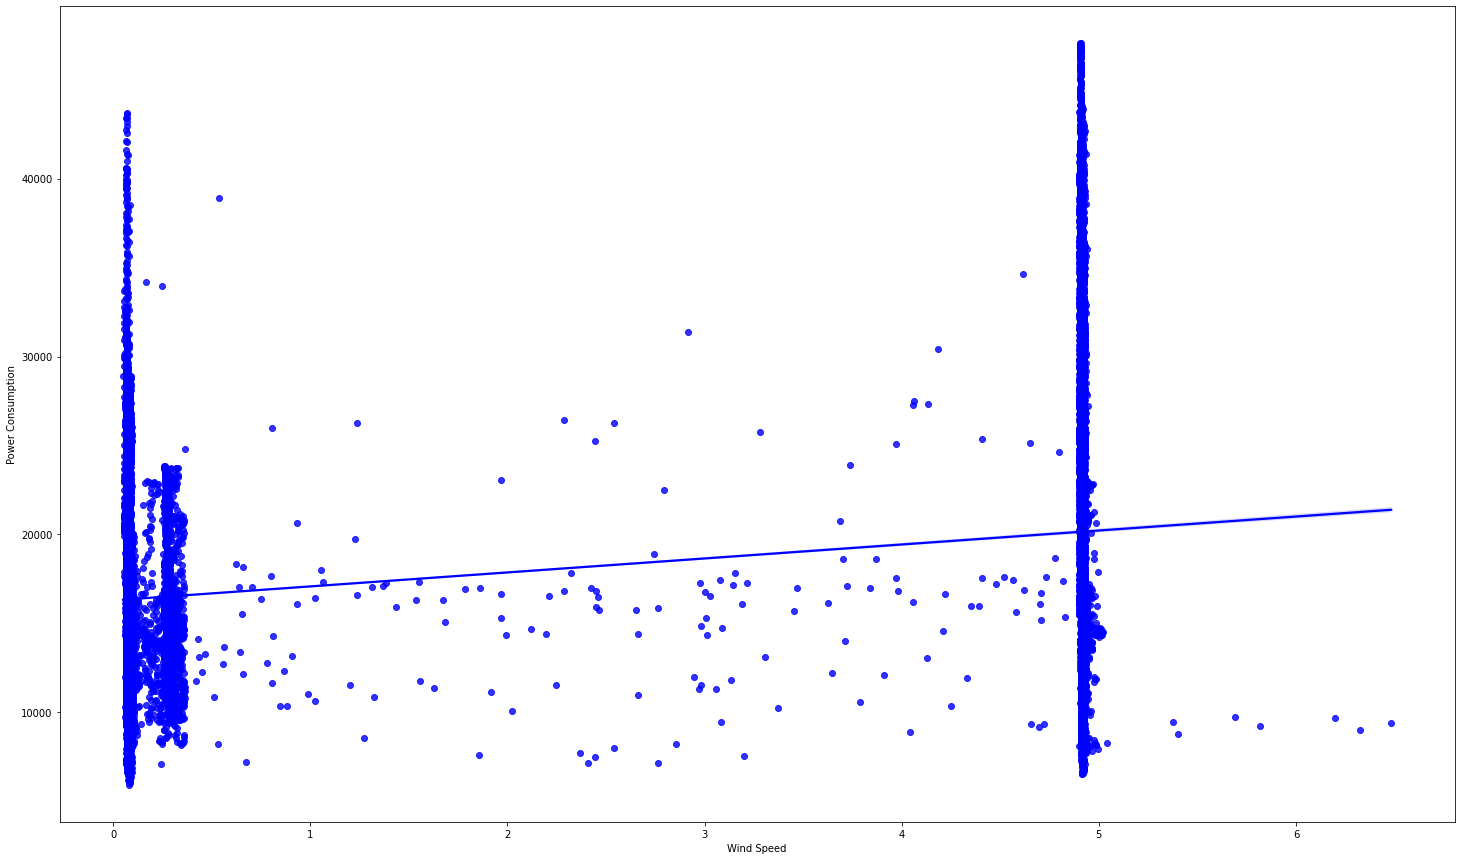

In [32]:
def regressionPlot(xVar, yVar, regColor):
    fig, ax = plt.subplots(figsize=(25, 15))
    sns.regplot(x=xVar, y=yVar, data=df, ax=ax, color=regColor)
    plt.ylabel("Power Consumption")
regressionPlot("Temperature", "Zone 1 Power Consumption", "red")
regressionPlot("Temperature", "Zone 2  Power Consumption", "green")
regressionPlot("Temperature", "Zone 3  Power Consumption", "blue")
regressionPlot("Humidity", "Zone 1 Power Consumption", "red")
regressionPlot("Humidity", "Zone 2  Power Consumption", "green")
regressionPlot("Humidity", "Zone 3  Power Consumption", "blue")
regressionPlot("Wind Speed", "Zone 1 Power Consumption", "red")
regressionPlot("Wind Speed", "Zone 2  Power Consumption", "green")
regressionPlot("Wind Speed", "Zone 3  Power Consumption", "blue")

## **Data prediction from the datasets**

In [35]:
y_pred = lr_model.predict(x_test)
print("Data: \n", y_test[0:10])
print("\n")
print("Prediction: \n", y_pred[0:10])

Data: 
 [[28228.86076]
 [25446.07595]
 [23896.70886]
 [21903.79747]
 [21685.06329]
 [21107.8481 ]
 [20870.88608]
 [20597.46835]
 [21393.41772]
 [22219.74684]]


Prediction: 
 [[25513.91227966]
 [25177.43372885]
 [25188.20104247]
 [24854.95268575]
 [24921.17166455]
 [25001.38815106]
 [24928.70878409]
 [24854.41432007]
 [24486.17219406]
 [24537.85529946]]


## **Finding MAE and MSE from the datasets**

In [37]:
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_pred, y_test))
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 5217.06
Mean Squared Error (MSE): 40790177.69
